In [4]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
unis = pd.read_csv("./Estadística/uk_universities.csv")
unis.head()

,University_name,Region,Founded_year,Motto,UK_rank,World_rank,CWUR_score,Minimum_IELTS_score,UG_average_fees_(in_pounds),PG_average_fees_(in_pounds),...,Student_satisfaction,Student_enrollment,Academic_staff,Control_type,Academic_Calender,Campus_setting,Estimated_cost_of_living_per_year_(in_pounds),Latitude,Longitude,Website
0,University of Cambridge,East of England,1209,"From here, light and sacred draughts",1,4,94.1,6.5,21750,23187,...,85.50%,"20,000-24,999","over-5,000",Public,Trimesters,Urban,12000,52.2054,0.1132,www.cam.ac.uk
1,University of Oxford,South East England,1096,The Lord is my light,2,2,93.3,6.5,21770,19888,...,86.50%,"25,000-29,999","over-5,000",Public,Trimesters,Urban,11500,51.7548,-1.2544,www.ox.ac.uk
2,University of St Andrews,Scotland,1413,Ever to excel,3,86,75.8,6.5,17040,15440,...,87.90%,"10,000-14,999","1,000-1,499",Public,Semesters,Suburban,12000,56.3417,-2.7943,www.st-andrews.ac.uk
3,Imperial College London,London,1907,Knowledge is the adornment and safeguard of th...,4,8,86.6,6.5,23500,29900,...,77.90%,"15,000-19,999","4,000-4,499",Public,Continuous,Urban,10700,51.4988,-0.1749,www.ic.ac.uk
4,Loughborough University,East Midlands,1966,"With Truth, Knowledge and Labour",5,404,72.8,5.5,16400,16400,...,85.80%,"15,000-19,999","1,500-1,999",Public,Semesters,Suburban,9398,52.7650,-1.2321,www.lboro.ac.uk/


In [6]:
# Ejercicio 1. Extraer los siguentes estadísiticos del conjunto de datos para varias de las varibles disponibles:
# Utilizando métodos de pandas: media, mediana, moda, máximo y mínimo
# Percentiles 25 y 75

# Vamos a trabajar con dos variables/columnas, World_rank y UG_average_fees_(in_pounds)

In [7]:
unis.describe()

,Founded_year,UK_rank,World_rank,CWUR_score,Minimum_IELTS_score,UG_average_fees_(in_pounds),PG_average_fees_(in_pounds),Estimated_cost_of_living_per_year_(in_pounds),Latitude,Longitude
count,131.000000,131.000000,131.00000,84.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000
mean,1925.221374,65.900763,1097.59542,73.960714,4.946565,12537.450382,13099.763359,8644.732824,52.749708,-1.673287
std,139.040187,37.922158,1145.00106,6.351473,0.617850,2555.318861,3106.398149,1579.049538,1.638257,1.503049
min,1096.000000,1.000000,2.00000,65.900000,4.000000,8350.000000,6000.000000,5500.000000,50.171300,-6.675200
25%,1896.000000,33.500000,196.00000,68.675000,4.500000,10758.000000,11250.000000,7710.500000,51.499700,-2.748000
50%,1966.000000,65.000000,691.00000,72.600000,4.500000,12000.000000,12500.000000,8217.000000,52.407400,-1.551600
75%,1992.000000,98.000000,1569.00000,77.700000,5.500000,13825.000000,14182.500000,9457.500000,53.608500,-0.388150
max,2013.000000,131.000000,5253.00000,94.100000,6.500000,23500.000000,29900.000000,15000.000000,57.164800,1.296700


In [8]:
ranking = unis["World_rank"]
precio = unis["UG_average_fees_(in_pounds)"]

In [9]:
rank_moda = ranking.mode()
precio_moda = precio.mode()
print(rank_moda)
print(precio_moda)

0    196
dtype: int64
0    10500
dtype: int64


In [10]:
# Rango intercualítico

q3, q1 = np.percentile(ranking, [75, 25])
rank_riq = q3 -q1
rank_riq

1373.0

In [11]:

q3b, q1b = np.percentile(precio, [75, 25])
precio_riq = q3b -q1b
precio_riq

3067.0

In [12]:
# Boxplot de algunas variables

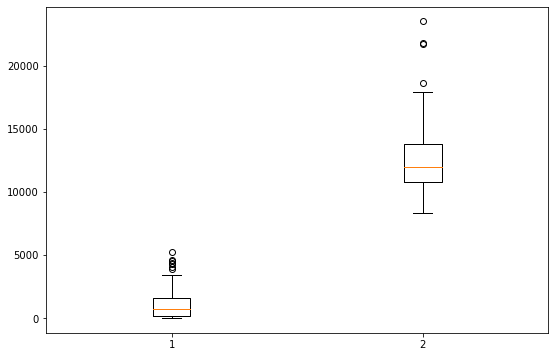

In [22]:
datos_grafica = [ranking, precio]

fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(1,1,1)
bp = ax.boxplot(datos_grafica)

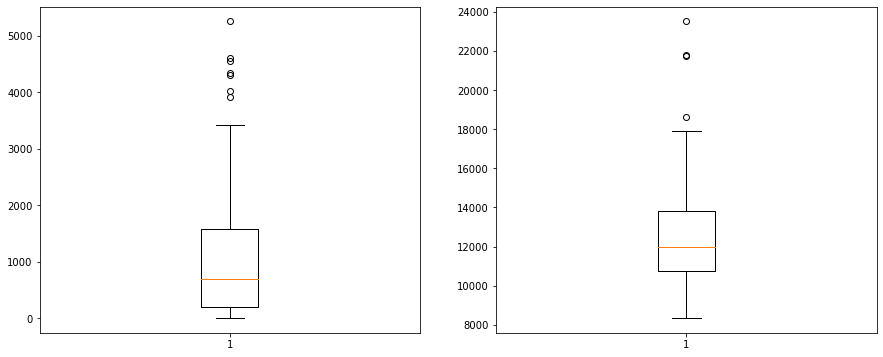

In [26]:
fig = plt.figure(1, figsize=(15, 6))

ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)

ax1.boxplot(ranking)
ax2.boxplot(precio)

plt.show()

In [43]:
# Tabla de frecuencias
# Vamos a hacer un groupby de cualitativas

unis["Campus_setting"].unique()

emplazamimento = unis.groupby("Campus_setting")
frecuencia_emplazamiento = emplazamimento.agg(frecuencia = ("Campus_setting","count")).reset_index()

In [44]:
frecuencia_emplazamiento

,Campus_setting,frecuencia
0,Rural,8
1,Suburban,37
2,Urban,68


In [16]:
# Variables cuantitativas
fundacion = unis.groupby("Founded_year")
frecuencia_fundacion = fundacion.agg(frecuencia = ("Founded_year","count")).reset_index()

In [17]:
frecuencia_fundacion

,Founded_year,frecuencia
0,1096,1
1,1209,1
2,1413,1
3,1451,1
4,1495,1
...,...,...
65,2008,1
66,2010,1
67,2011,1
68,2012,3


In [18]:
# frecuencia acumulada

In [32]:
bins = 10 # intervalos de aproximadamente un siglo durante 10 siglos

frecuencia_fundacion["group"] = pd.cut(unis["Founded_year"], bins=bins) 

a = frecuencia_fundacion.groupby("group").agg(frecuencia=("Founded_year", "count")).reset_index()
a

,group,frecuencia
0,"(1095.083, 1187.7]",1
1,"(1187.7, 1279.4]",1
2,"(1279.4, 1371.1]",0
3,"(1371.1, 1462.8]",2
4,"(1462.8, 1554.5]",1
5,"(1554.5, 1646.2]",1
6,"(1646.2, 1737.9]",1
7,"(1737.9, 1829.6]",3
8,"(1829.6, 1921.3]",21
9,"(1921.3, 2013.0]",39


In [33]:
frecuencia_acumulada = a["frecuencia"].cumsum()
frecuencia_acumulada

0     1
1     2
2     2
3     4
4     5
5     6
6     7
7    10
8    31
9    70
Name: frecuencia, dtype: int64

In [ ]:
# Representación de, al menos, una tabla de

In [84]:
x = unis["Campus_setting"].values
x


array(['Urban', 'Urban', 'Suburban', 'Urban', 'Suburban', 'Urban',
       'Urban', 'Rural', 'Urban', 'Suburban', 'Suburban', 'Suburban',
       'Urban', 'Urban', 'Urban', 'Urban', 'Rural', 'Urban', 'Suburban',
       'Suburban', 'Suburban', 'Suburban', 'Suburban', 'Urban', 'Urban',
       'Urban', 'Urban', 'Urban', 'Urban', 'Urban', 'Suburban',
       'Suburban', 'Suburban', 'Urban', 'Urban', 'Urban', 'Suburban', nan,
       nan, 'Urban', 'Suburban', nan, nan, 'Urban', 'Suburban', 'Rural',
       'Suburban', 'Urban', 'Urban', 'Urban', 'Urban', nan, 'Suburban',
       'Suburban', 'Rural', 'Urban', 'Urban', 'Suburban', 'Urban',
       'Suburban', 'Urban', nan, 'Urban', 'Urban', 'Urban', 'Urban',
       'Urban', 'Urban', 'Urban', nan, 'Suburban', nan, 'Urban', nan,
       'Urban', nan, 'Suburban', 'Urban', 'Urban', nan, 'Urban',
       'Suburban', 'Suburban', 'Suburban', 'Suburban', 'Urban', 'Urban',
       'Suburban', 'Rural', 'Urban', 'Urban', 'Rural', 'Suburban',
       'Urban', 'Subur

In [116]:
type(datos[0])

str

TypeError: 'value' must be an instance of str or bytes, not a float

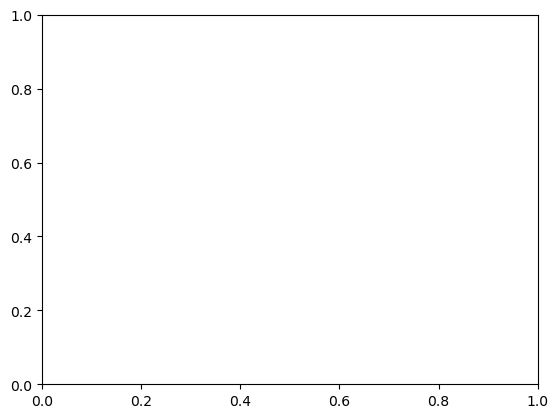

In [114]:
datos = np.array(unis["Campus_setting"])
plt.figure()
plt.hist(datos)
plt.show()


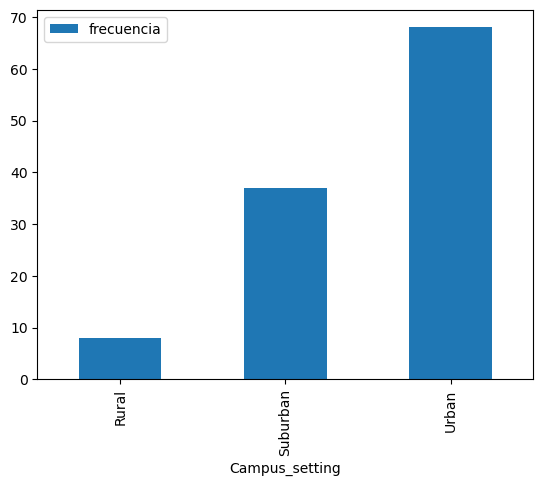

In [77]:
# Primero agrupamos el dataframe por la columna species.
emplazamimento = unis.groupby("Campus_setting") # Devolvera un objeto DataFrameGroupBy

# Aplicamos el método agg para agregar los datos por la columa species.
frecuencia_emplazamiento = emplazamimento.agg(frecuencia = ("Campus_setting","count"))

# Pandas nos proporciona el metodo plot.bar() para hacer un gráfico de barras de manera sencilla
frecuencia_emplazamiento.plot.bar()

plt.show()

In [117]:
a = frecuencia_fundacion.groupby("group").agg(frecuencia=("Founded_year", "count")).reset_index()
a

,group,frecuencia
0,"(1095.083, 1187.7]",1
1,"(1187.7, 1279.4]",1
2,"(1279.4, 1371.1]",0
3,"(1371.1, 1462.8]",2
4,"(1462.8, 1554.5]",1
5,"(1554.5, 1646.2]",1
6,"(1646.2, 1737.9]",1
7,"(1737.9, 1829.6]",3
8,"(1829.6, 1921.3]",21
9,"(1921.3, 2013.0]",39


In [ ]:
# Ejercicio 2. Interpretación de los resultados.
# Ahora interpreta los resultados obtenidos de los diferentes estadísticos estudiados haciendo hincapié en 
# aspectos interesantes de tus datos y explica lo mejor posible la naturaleza de los mismos.